In [16]:
import numpy as np
import csv
import pandas as pd
#pd.set_option('display.max_columns', None)
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import networkx.algorithms.community as community

In [17]:
node_info = pd.read_csv("../data/node_information.csv", header=None)
test_set = pd.read_csv("../data/test.txt", sep=" ", header=None, names=['source', 'target'])
train_set = pd.read_csv("../data/train.txt", sep=" ", header=None, names=['source', 'target', 'label'])

# Graph creation
G = nx.from_pandas_edgelist(train_set, 'source', 'target', 'label')

In [18]:
train_set.describe()

,source,target,label
count,10496.000000,10496.000000,10496.000000
mean,2360.268769,4889.190835,0.500000
std,1726.050552,1806.270558,0.500024
min,0.000000,87.000000,0.000000
25%,908.000000,3604.000000,0.000000
50%,2048.500000,5118.000000,0.500000
75%,3505.000000,6422.250000,1.000000
max,7576.000000,7599.000000,1.000000


In [19]:
train_set['label'].value_counts()

label
1    5248
0    5248
Name: count, dtype: int64

In [20]:
# Nodes
print("Number of nodes :", G.number_of_nodes())

# Links
print("Number of links :", G.number_of_edges())


Number of nodes : 3597
Number of links : 10496


In [21]:
# Degree
degrees = [(n, G.degree(n)) for n in G.nodes()]
print("Degré moyen :", np.mean([degree[1] for degree in degrees]))
sorted_degrees = sorted(degrees, key=lambda x: x[1], reverse=True)

print("The 5 nodes with the highest degrees:")
for node, degree in sorted_degrees[:5]:
    print("Node:", node, ", Degree:", degree)

Degré moyen : 5.835974423130386
The 5 nodes with the highest degrees:
Node: 3809 , Degree: 361
Node: 6416 , Degree: 53
Node: 7426 , Degree: 42
Node: 7174 , Degree: 39
Node: 7272 , Degree: 39


In [22]:
# Centrality
centrality = nx.degree_centrality(G)
sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
print("The 5 nodes with the highest centrality :", sorted_centrality[:5])


The 5 nodes with the highest centrality : [(3809, 0.10038932146829811), (6416, 0.014738598442714126), (7426, 0.01167964404894327), (7174, 0.010845383759733037), (7272, 0.010845383759733037)]


In [23]:
# Density of network
print("Density of network :", nx.density(G)*100)

Density of network : 0.1622907236688094


In [24]:
avg_shortest_path_length = nx.average_shortest_path_length(G)
print("Average shortest path length:", avg_shortest_path_length)

Average shortest path length: 4.357065723104441


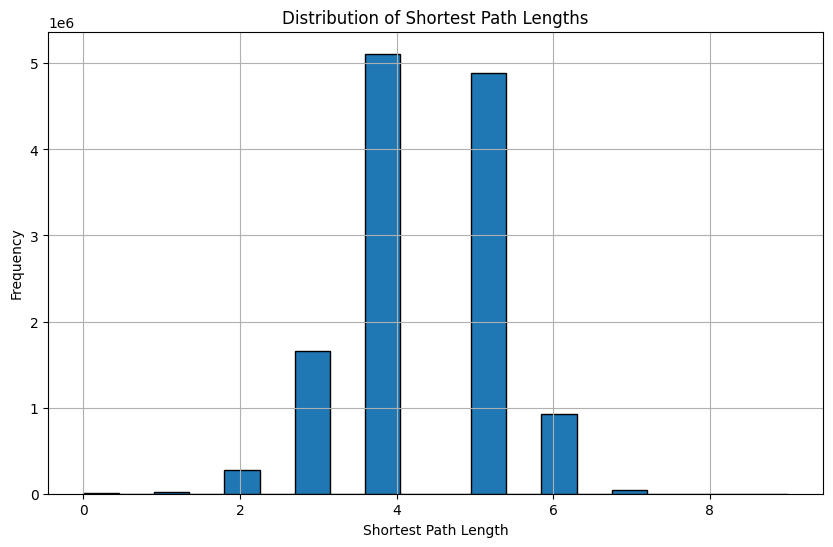

In [25]:
all_shortest_paths = []
for node in G.nodes():
    shortest_paths = nx.shortest_path_length(G, node)
    all_shortest_paths.extend(list(shortest_paths.values()))

plt.figure(figsize=(10, 6))
plt.hist(all_shortest_paths, bins=20, edgecolor='black')
plt.title('Distribution of Shortest Path Lengths')
plt.xlabel('Shortest Path Length')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [26]:
largest_clique = nx.graph_clique_number(G)

print("Size of the largest clique (fully connected component):", largest_clique)

Size of the largest clique (fully connected component): 3


In [27]:
motifs = nx.algorithms.triangles(G)
num_triangles = sum(motifs.values()) // 3  # Divide by 3 since each triangle is counted 3 times
print("Number of triangles (3-node motifs):", num_triangles)

Number of triangles (3-node motifs): 286


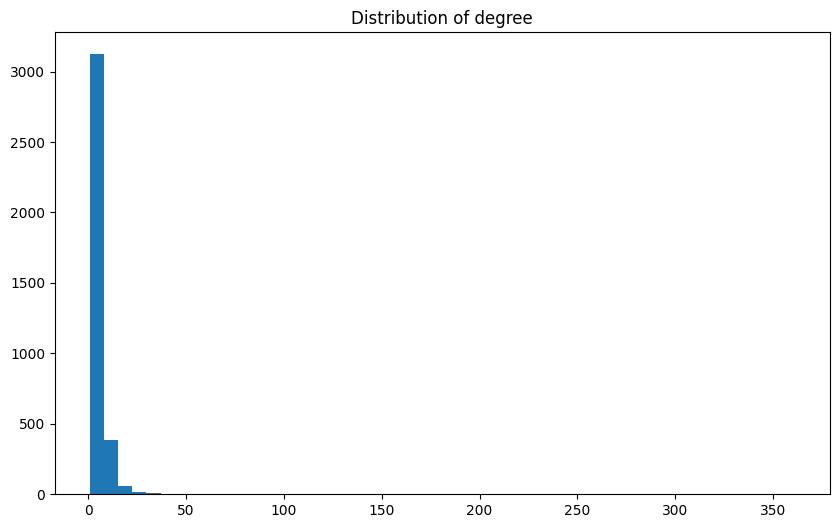

In [28]:
degrees = [G.degree(n) for n in G.nodes()]
plt.figure(figsize=(10,6))
plt.title("Distribution of degree")
plt.hist(degrees, bins=50)
plt.show()


Global clustering coefficient: 0.011554626086583924


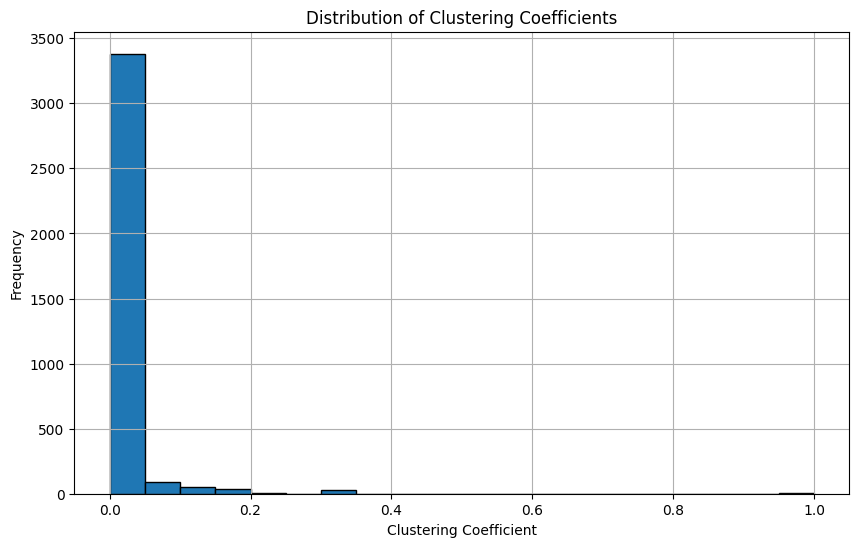

In [29]:
clustering_coefficient = nx.average_clustering(G)
print("Global clustering coefficient:", clustering_coefficient)

# Node-wise clustering coefficient
node_clustering_coefficients = nx.clustering(G)

plt.figure(figsize=(10, 6))
plt.hist(node_clustering_coefficients.values(), bins=20, edgecolor='black')
plt.title('Distribution of Clustering Coefficients')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()